<html>
  <h1  align="center";> Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
  </h1>
<hr>
  <h3 align="center";>
  Edición 2022
  </h3>
<hr>
  <h1 align="center";>
  Trabajo Práctico Entregable
  </h1>
  <h2 align="center";>
   Ejercicio 1 - Parte 2
  </h2>
</html>


## Profesora del Práctico:
- Fonseca, Rocio

## Integrantes [ Grupo 5 ]:
- Argüello, Leandro Ismael
- Corral, Diego
- Racciatti. Florencia 
- Rinaudo, Eleana
- Romero, Ernest

<html>
<hr>
  <h1  align="center";>
    Análisis Curación y Exploración de Datos
  </h1>
</html>


En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en **Melbourne, Australia**.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). 

Hemos subido una copia a un servidor de la **Universidad Nacional de Córdoba** para facilitar su acceso remoto.

## Importación de librerías

Importamos la librerías que vamos a utilizar en el práctico.

In [ ]:
!pip install python-decouple;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import missingno as msno
import seaborn as sns
sns.set_context('talk')

#from decouple import config
from sqlalchemy import create_engine, text

pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

## Lectura del dataset

Cargamos el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en **Melbourne, Australia**.

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


In [ ]:
melb_df = pd.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv"
)
melb_df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Cargamos el [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 

In [ ]:
airbnb_df = pd.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv",
)
airbnb_df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,https://a0.muscache.com/im/pictures/44620/5a58...,33057,https://www.airbnb.com/users/show/33057,Manju,8/21/2009,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,"Bulleen, Australia",AU,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,NaN,NaN,1,22,1,365,17 months ago,t,30,60,90,365,12/7/2018,4,5/24/2011,9/12/2015,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,https://a0.muscache.com/im/pictures/31323790/9...,38901,https://www.airbnb.com/users/show/38901,Lindsay,9/16/2009,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,"Brunswick East, Australia",AU,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,0.0,9.0,1,15,3,45,6 weeks ago,t,4,9,33,213,12/7/2018,108,1/12/2013,11/26/2018,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is

<html>
  <h2  align="center";>
    Leemos las columnas del dataset de <strong>Melbourne</strong>
  </h2>
</html>


In [ ]:
melb_df.columns.tolist()


['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

<html>
  <h2  align="center";>
    Columnas relevantes para el análisis del problema
  </h2>
</html>

In [ ]:
relevant_columns_to_price_issue = [
    "Suburb",
    "Address",
    "Rooms",
    "Type",
    "Price",
    "Method",
    "Date",
    "Distance",
    "Bathroom",
    "Bedroom2",
    "Car",
    "Landsize",
    "BuildingArea",
    "CouncilArea",
    "Regionname",
    "Propertycount",
    "Postcode",
    "YearBuilt",
]


<html>
  <h2  align="center";>
    Eliminación y limpieza de valores extremos
  </h2>
</html>



Visualicemos los valores faltantes de las columnas del dataset:





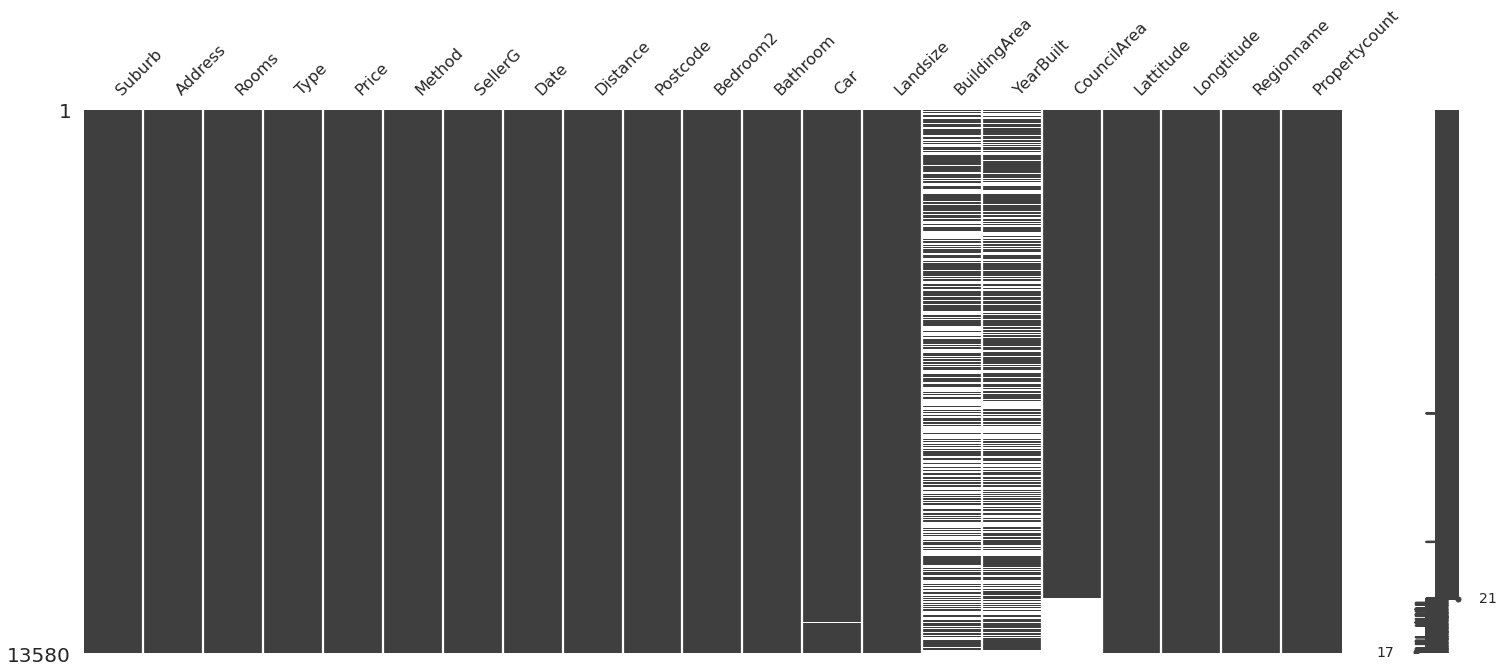

In [ ]:
msno.matrix(melb_df)

> **Observación:**
>
> Observamos con el gráfico que las columnas `BuildingArea`, `YearBuilt`, `CouncilArea` y `Car` obtienen varios datos nulos.


Hacemos una copia del dataset de **Melbourne** con las columnas que consideramos relevantes.

In [ ]:
melb_df_cols = melb_df[relevant_columns_to_price_issue].copy()


Mediante **histogramas** y **lineplots**(entre cada columna y `Price`) observamos distribuciones y relaciones con la columna `Price`.

In [ ]:
columns_list = [
  'Suburb', 'Rooms', 'Type', 'Price', 'Method',
  'Date', 'Distance', 'Bathroom', 'Bedroom2', 'Car',
  'Landsize','BuildingArea','CouncilArea','Regionname',
  'Propertycount', 'Postcode', 'YearBuilt'
]

data_frame = melb_df[columns_list]

In [ ]:
def histplot_graficos(data_frame, columns_list):
    n = 0
    fig, axes = plt.subplots(nrows=len(columns_list), figsize=(30, 80))
    for i in columns_list:
      sns.set_theme(style="whitegrid", palette="Set2")
      sns.histplot(data_frame[i], ax=axes[n])  
      n += 1


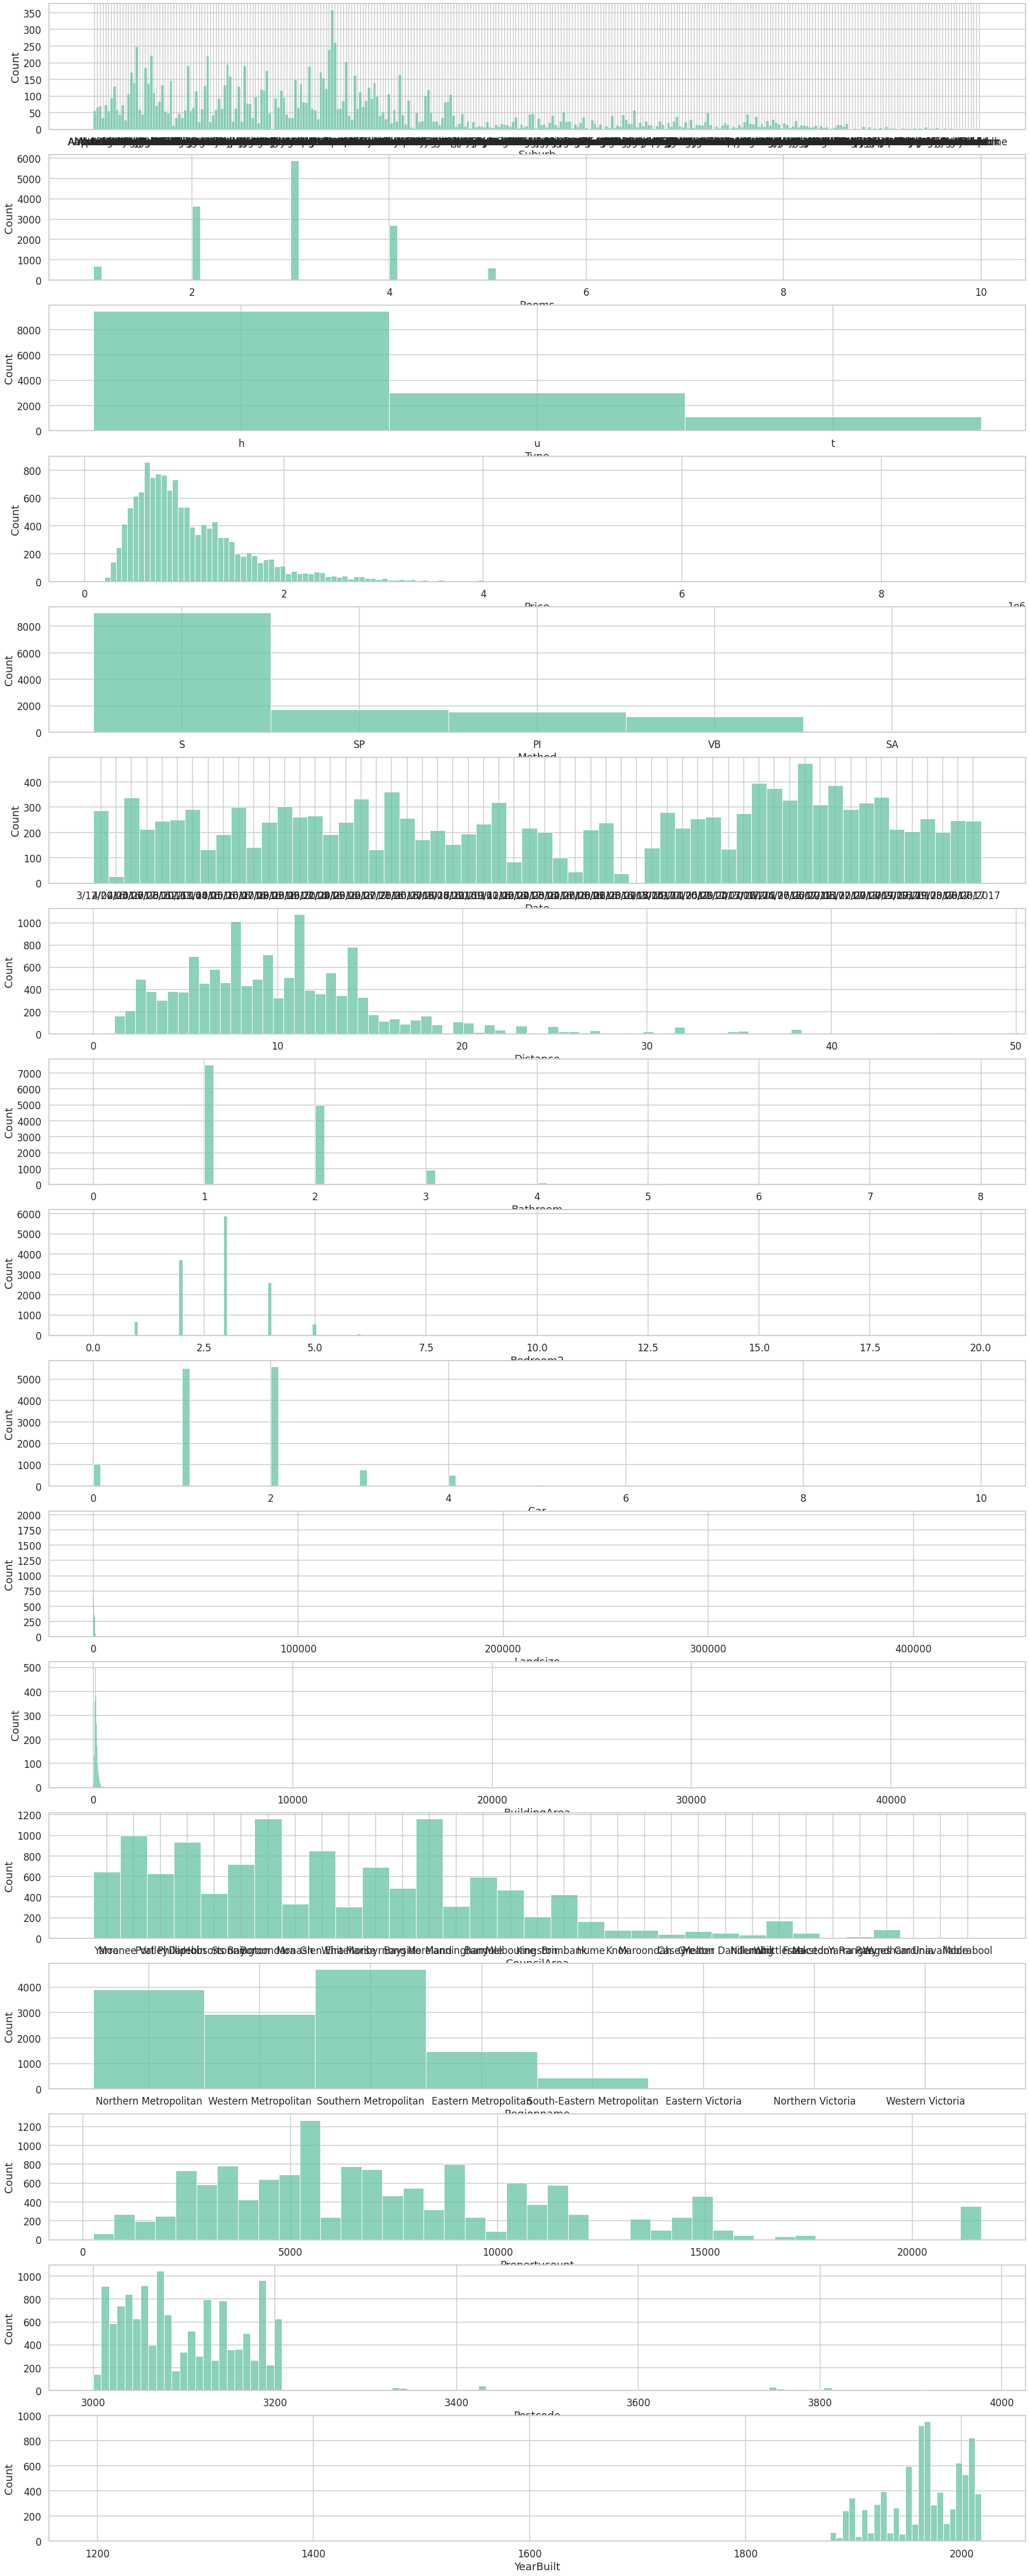

In [ ]:
histplot_graficos(data_frame, columns_list)


Creamos un gráfico de relación con el promedio de la columna `Price` con la lista de columnas de `columns_list`

In [ ]:
def line_graficos(data_frame, columns_list):
    n = 0
    fig, axes = plt.subplots(nrows=len(columns_list), figsize=(30, 80))
    for i in columns_list:
        sns.set_theme(style="whitegrid", palette="Set2")
        sns.lineplot(data=data_frame, x=i, y="Price", ax=axes[n])
        n += 1


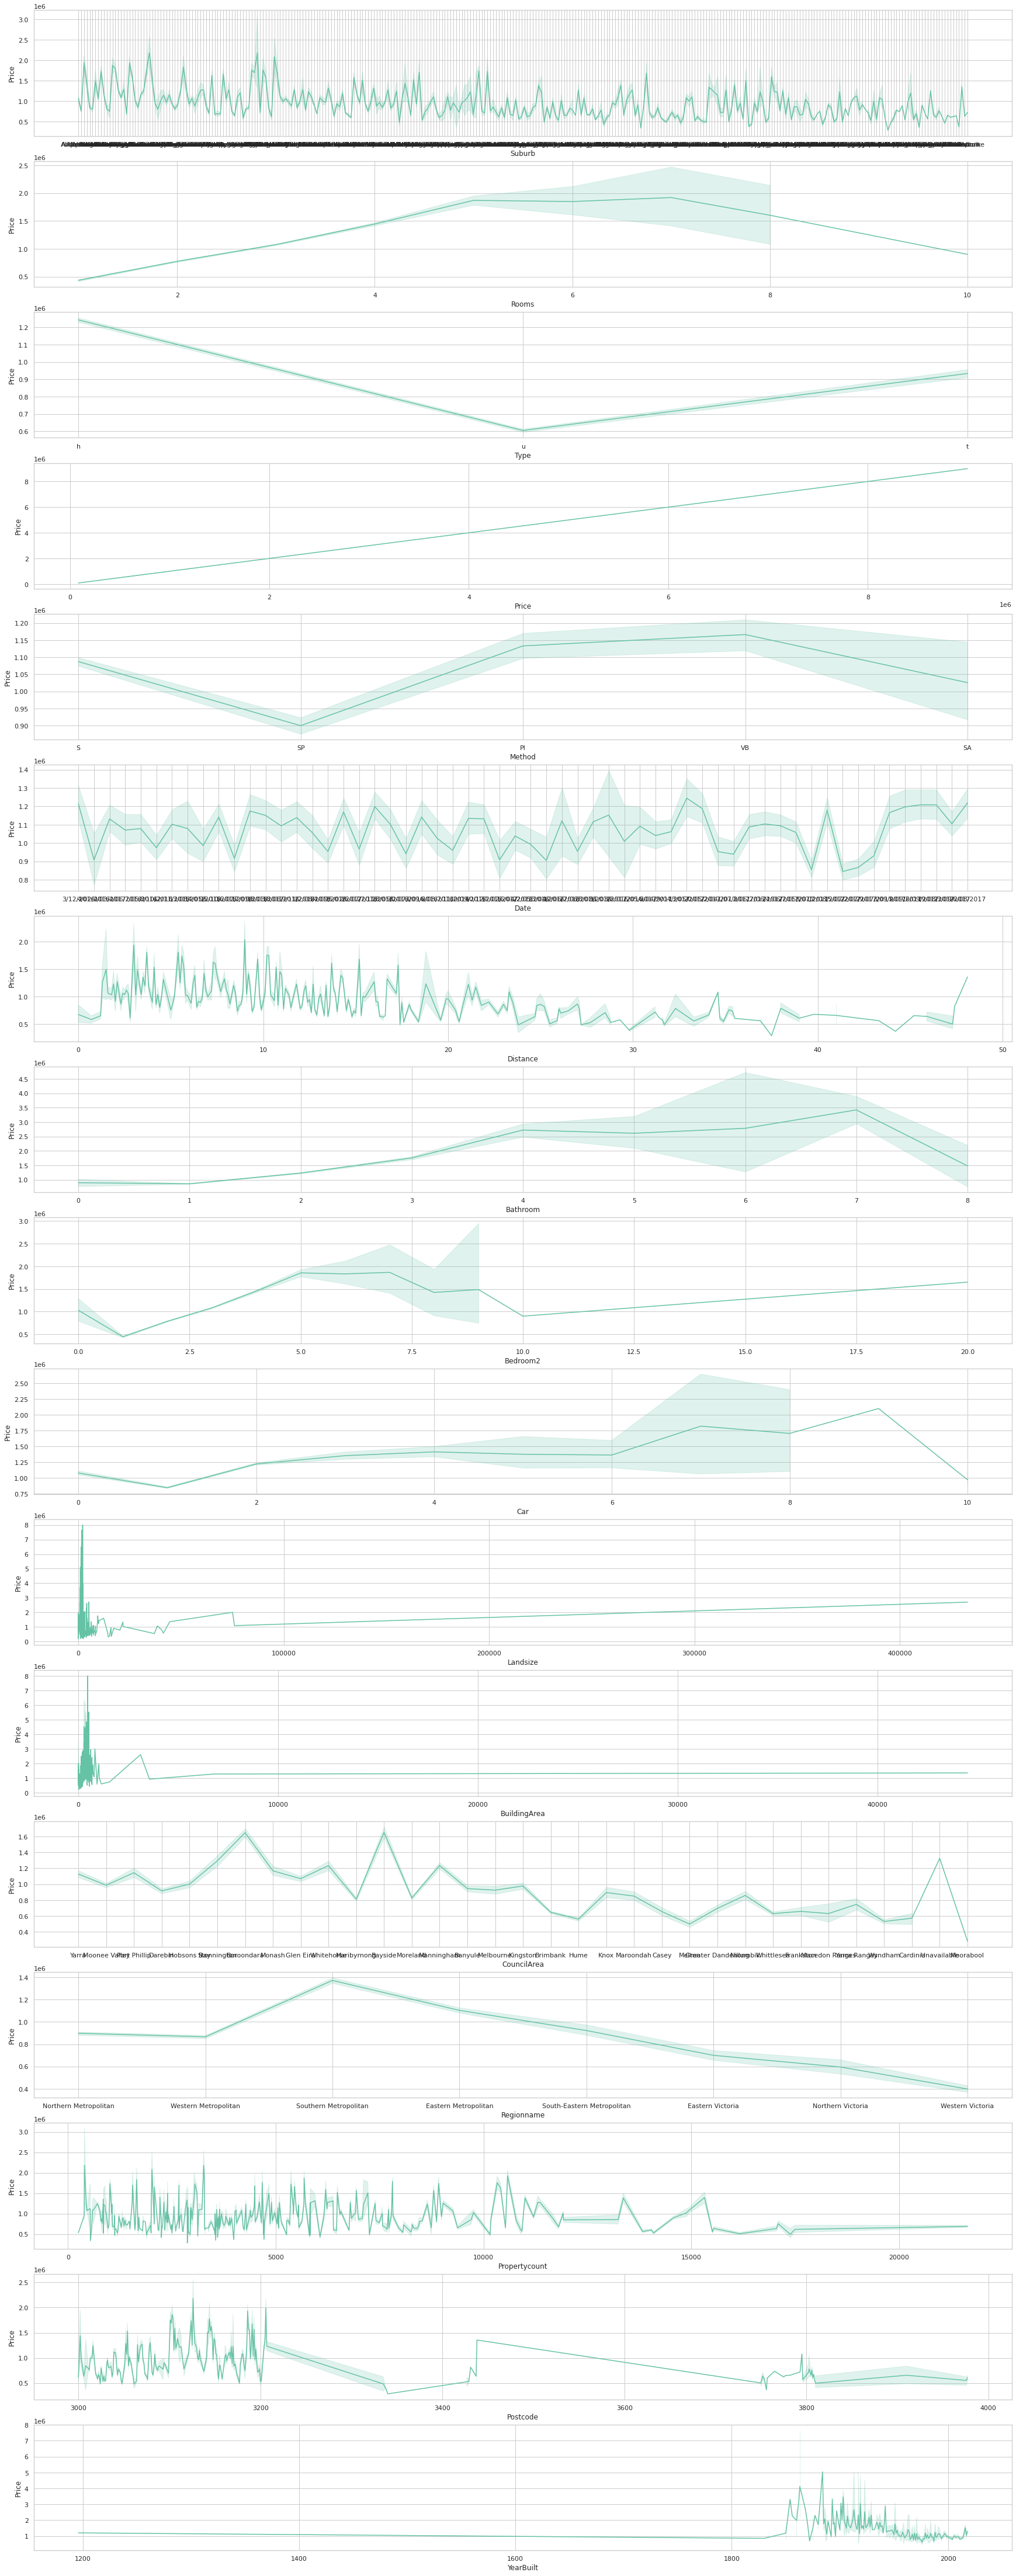

In [ ]:
line_graficos(data_frame,columns_list)


Definimos las columnas que vamos a considerar **relevantes**

In [ ]:
cols_df = [
    "Suburb",
    "Rooms",
    "Type",
    "Price",
    "Distance",
    "Bathroom",
    "Car",
    "Landsize",
    "Regionname",
    "Propertycount",
    "Date",
    "Postcode",
    "CouncilArea",
    "YearBuilt",
    "Bedroom2",
]

data_frame_cols = data_frame[cols_df]
data_frame_cols.columns


Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Bathroom', 'Car',
       'Landsize', 'Regionname', 'Propertycount', 'Date', 'Postcode',
       'CouncilArea', 'YearBuilt', 'Bedroom2'],
      dtype='object')

**Analizamos** estas columnas

<html>
  <h3 align="center";>
    Columna <strong>Rooms vs Bedroom2</strong>
  </h3>
</html>

Utiliremos el método `value_counts` que contiene recuentos de los valores únicos de estas columna

In [ ]:
melb_df.Rooms.value_counts()

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

In [ ]:
melb_df.Bedroom2.value_counts()

3.0     5896
2.0     3737
4.0     2601
1.0      691
5.0      556
6.0       63
0.0       16
7.0       10
8.0        5
9.0        3
20.0       1
10.0       1
Name: Bedroom2, dtype: int64

Usamos `crosstab` y `heatmap` para observar la tabulación cruzada de los datos

In [ ]:
mapa_cross = pd.crosstab(data_frame.Rooms, data_frame.Bedroom2)
mapa_cross

Bedroom2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0
Rooms,,,,,,,,,,,,
1,0,663,16,2,0,0,0,0,0,0,0,0
2,5,21,3539,74,8,1,0,0,0,0,0,0
3,8,5,162,5626,73,5,0,0,0,1,0,1
4,3,2,19,175,2473,15,0,0,0,1,0,0
5,0,0,1,18,42,531,2,1,1,0,0,0
6,0,0,0,1,4,2,59,1,0,0,0,0
7,0,0,0,0,0,2,0,8,0,0,0,0
8,0,0,0,0,1,0,2,0,4,1,0,0
10,0,0,0,0,0,0,0,0,0,0,1,0


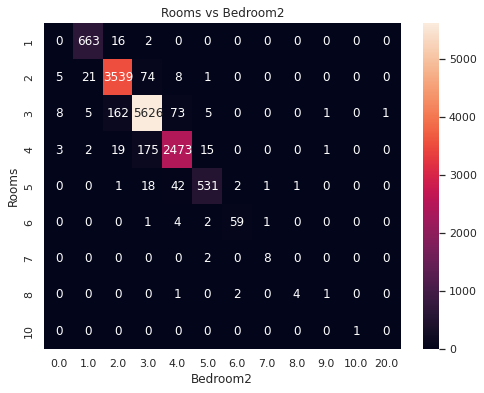

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mapa_cross, annot=True, fmt="g")
plt.title("Rooms vs Bedroom2")
plt.show()


> **Observación:**
>
> Observamos con la matriz de correlación que hay muchos datos concentrados en la diagonal secundaria, lo cual indica que los número de `Rooms` y `Bedroom2` es el mismo por lo que podríamos usar cualquiera de las dos variables. Además, `Bedroom2` cuenta con valores iguales a cero y más cantidad de outliers que `Rooms`.

Analizamos la cantidad de **nulls** de las columnas `BuildingArea`, `YearBuilt` y `CouncilArea`

<html>
  <h3 align="center";>
    Columna <strong>BuildingArea</strong>
  </h3>
</html>

In [ ]:
melb_df.BuildingArea.isnull().sum()

6450

> **Observación:**
>
> Observamos que en esta columna hay 6450 datos nulos.

<html>
  <h3 align="center";>
    Columna <strong>YearBuilt</strong>
  </h3>
</html>

In [ ]:
melb_df.YearBuilt.isnull().sum()

5375

> **Observación:**
>
> Observamos que en esta columna hay 5375 datos nulos.


<html>
  <h3 align="center";>
    Columna <strong>CouncilArea</strong>
  </h3>
</html>

In [ ]:
melb_df.CouncilArea.isnull().sum()

1369

> **Observación:**
>
> Observamos que en esta columna hay 1369 datos nulos.

### Columnas relevantes 
 
Decidimos elegir las siguientes columnas del dataset:
 
- **Rooms, Bathroom, Car**  
Son variables relacionadas con los espacios interiores de las propiedades que nos resultaron interesantes por los siguientes motivos:  
  - Por su correlación esencialmente de tipo lineal positivo con la variable Price visible en los gráficos lineplot.  
  - También observamos en los histogramas distribuciones interesantes de los datos que serán útiles en la predicción del precio.  
 
- **Suburb, Regionname, Distance, Postcode**
Son campos vinculados con localizaciones. Es de interés conocer cómo varía en general el precio según las zonas geográficas.
 
- **Type**  
Es una variable categórica que permite categorizar las propiedades por tipo. Observamos en su respectivo lineplot una media de precio considerablemente más alta para el valor "h" (house) respecto del resto de las categorías. Por lo cual, suponemos que esta variable categórica puede afectar a la predicción del precio.
 
- **Landsize**   
En los gráficos, no encontramos una relación convincente con el precio, pero consideramos que el área del terreno es uno de los factores importantes en la determinación del precio de una propiedad. 
 
- **Propertycount**   
Podríamos medir cuán densamente poblada está una zona o región, esperando posiblemente una relación inversa con el precio.



###Columnas Irrelevantes 
Decidimos no incluir las siguientes columnas en nuestro análisis:
 
*   **BedRoom2**  
Decidimos no tenerla en cuenta para el análisis de la consigna, porque la matriz de correlación porque hay muchos datos concentrados en la diagonal secundaria, lo que nos indica el número de 'Rooms' y 'Bedroom2' es el mismo por lo que podríamos usar cualquiera de las dos variables. 
Además, esta variable cuenta con valores iguales a cero y más cantidad de outliers que 'Rooms'.
*   **Building Area**  
Decidimos no usar esta variable porque contiene casi un 50% de datos nulos, que estimamos pueden ser provenientes de la falta de conocimiento del dato por parte del propietario.
*   **Address**  
Consideramos que la ubicación específica por dirección de la propiedad funcionaria como una distinción (ID) que en sí misma no nos proporciona un valor útil para calcular el precio de la propiedad.
*   **Yearbuild**  
Es otra variable que contiene muchos datos nulos, además también se presenta muy difícil y compleja para ser imputada. Puede ser relevante pero no es condicional para determinar el precio(ya que no se sabe el estado de la propiedad).
*   **SellerG**  
El agente inmobiliario es un dato irrelevante para determinar el precio de la propiedad.
*   **Method**  
La categoría que implica esta columna, no tiene valor real para lo que sería la determinación del precio de la propiedad.



<html>
  <h2  align="center";>
   Eliminación de <strong>Outliers</strong>
  </h2>
</html>


<html>
  <h3 align="center";>
    Columna <strong>Price</strong>
  </h3>
</html>



Graficamos la columna `Price` con `boxplot` y observamos los siguientes outliers

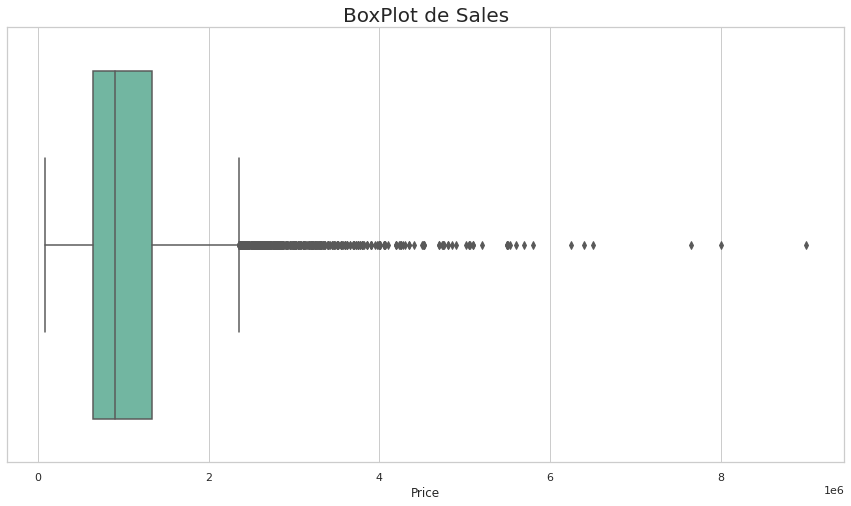

In [ ]:
sns.boxplot(data=melb_df_cols, x="Price").set_title(
    "BoxPlot de Sales", fontsize=20
);


In [ ]:
per_q1_m = melb_df["Price"].quantile(0.1)
print("Límite inferior Price:", per_q1_m)

per_q3_m = melb_df["Price"].quantile(0.9)
print("Límite Superior Price:", per_q3_m)


Límite inferior Price: 480000.0
Límite Superior Price: 1850000.0


In [ ]:
melb_df_cols = melb_df.loc[melb_df["Price"] < per_q3_m]
melb_df_cols = melb_df_cols.loc[melb_df_cols["Price"] > per_q1_m]

print("La cantidad de Precio con los cuartiles:", melb_df_cols.shape[0])


La cantidad de Precio con los cuartiles: 10843


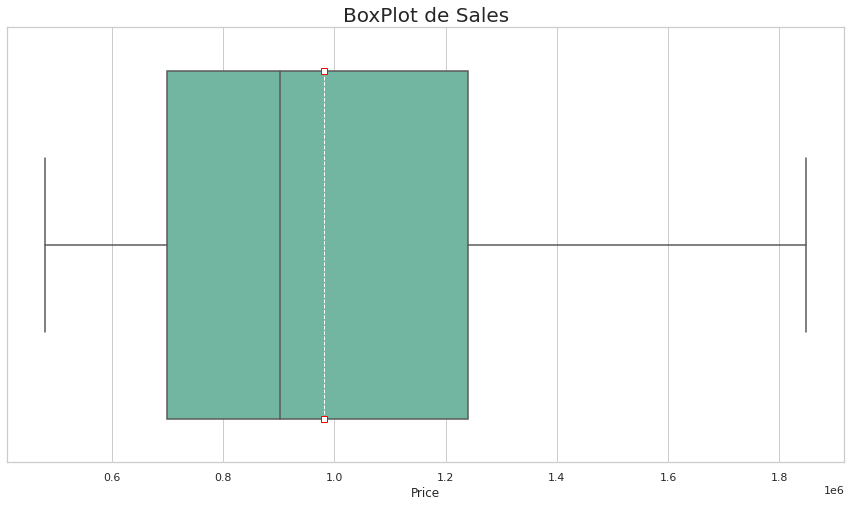

In [ ]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.color_palette("Set2")
sns.boxplot(
    x=melb_df_cols["Price"],
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de Sales", fontsize=20);



<html>
  <h3 align="center";>
    Columna <strong>Bathroom</strong>
  </h3>
</html>

Graficamos la columna `Bathroom`con `boxplot` y observamos los siguientes outliers

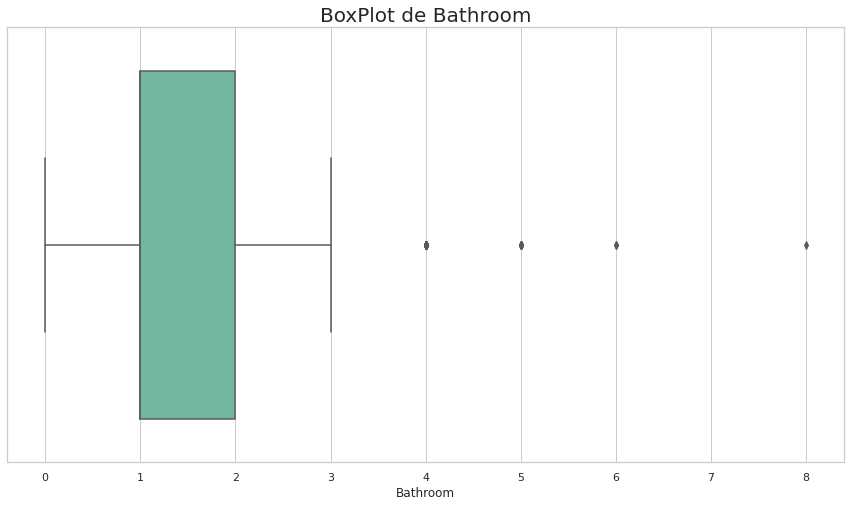

In [ ]:
sns.color_palette("Set2")
sns.boxplot(data=melb_df_cols, x="Bathroom").set_title(
    "BoxPlot de Bathroom", fontsize=20
);


In [ ]:
melb_df_cols.Bathroom.value_counts()


1.0    6037
2.0    4161
3.0     575
4.0      30
0.0      28
5.0       9
6.0       2
8.0       1
Name: Bathroom, dtype: int64

Reemplazamos los 0 por 1

In [ ]:
melb_df_cols["Bathroom"].replace({"0.0": "1.0"})


0        1.0
1        1.0
2        2.0
3        2.0
4        1.0
        ... 
13574    2.0
13575    2.0
13576    2.0
13577    2.0
13579    1.0
Name: Bathroom, Length: 10843, dtype: float64

Filtramos para que la cantidad de datos de `Bathroom` esten entre 1 y 3, inclusive.

In [ ]:
melb_df_cols = melb_df_cols.loc[(data_frame.Bathroom >=1) & (data_frame.Bathroom <=3)]
melb_df_cols.shape

(10773, 21)

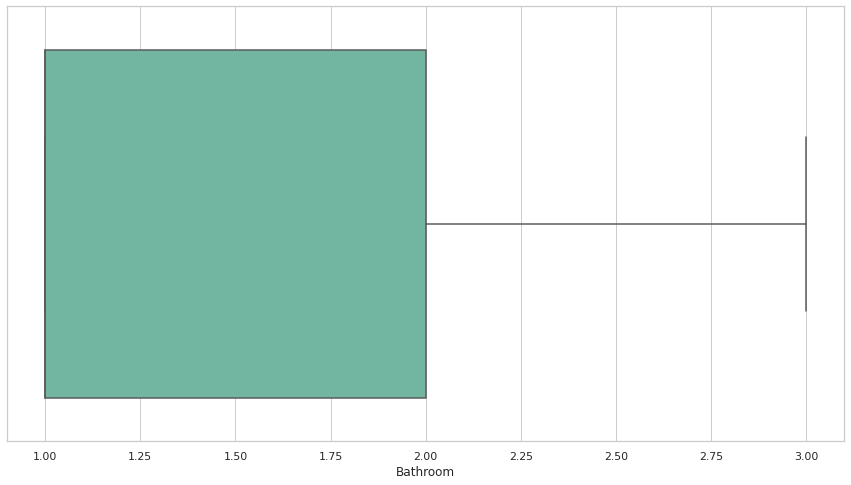

In [ ]:
sns.boxplot(data = melb_df_cols,x="Bathroom");



<html>
  <h3 align="center";>
    Columna <strong>Rooms</strong>
  </h3>
</html>

Graficamos la columna `Rooms`con `boxplot` y observamos los siguientes outliers

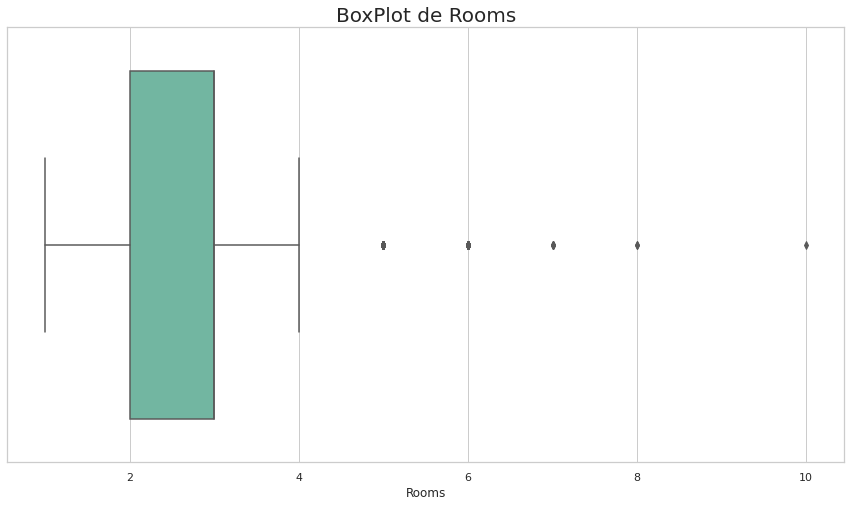

In [ ]:
sns.boxplot(data=melb_df_cols, x="Rooms").set_title("BoxPlot de Rooms", fontsize=20);


In [ ]:
melb_df_cols.Rooms.value_counts()


3     5241
2     2984
4     2038
5      330
1      141
6       31
7        5
8        2
10       1
Name: Rooms, dtype: int64

In [ ]:
melb_df_cols.Rooms.describe()


count    10773.000000
mean         2.959343
std          0.825815
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64

Filtramos para que la cantidad de `Rooms` sean menor a 4, inclusive.

In [ ]:
melb_df_cols = melb_df_cols.loc[(melb_df_cols.Rooms <= 4)]
melb_df_cols.shape


(10404, 21)

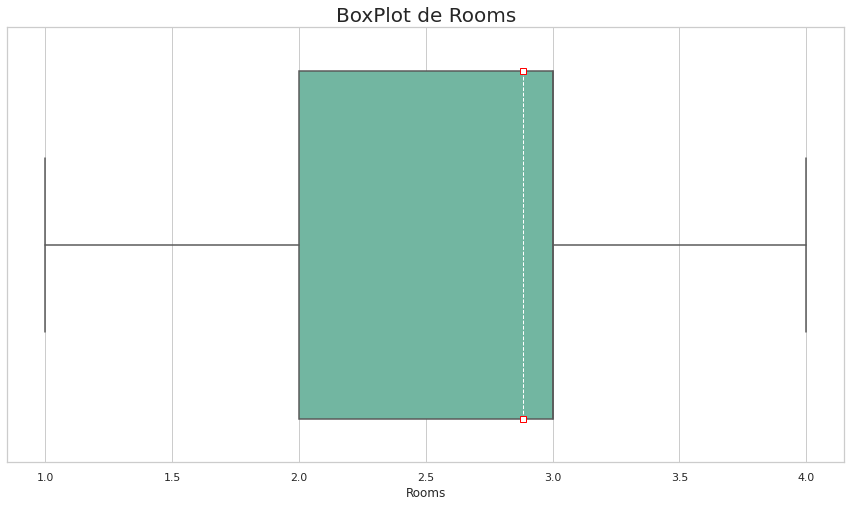

In [ ]:
sns.boxplot(
    data=melb_df_cols,
    x="Rooms",
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de Rooms", fontsize=20);


<html>
  <h3 align="center";>
    Columna <strong>Car</strong>
  </h3>
</html>

Graficamos la columna `Car`con `boxplot` y observamos los siguientes outliers

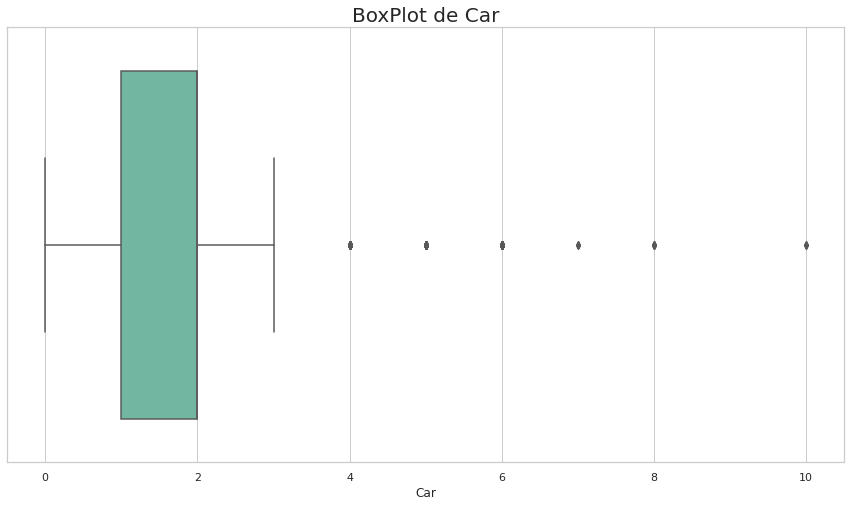

In [ ]:
sns.boxplot(data=melb_df_cols, x="Car").set_title("BoxPlot de Car", fontsize=20);


In [ ]:
melb_df_cols.Car.value_counts()


2.0     4401
1.0     4139
0.0      820
3.0      554
4.0      341
5.0       44
6.0       37
8.0        6
7.0        3
10.0       3
Name: Car, dtype: int64

Filtramos para que la cantidad de datos de `Car` sea menor a 4, inclusive.

In [ ]:
melb_df_cols = melb_df_cols.loc[(melb_df_cols.Car <= 4)]
melb_df_cols.shape


(10255, 21)

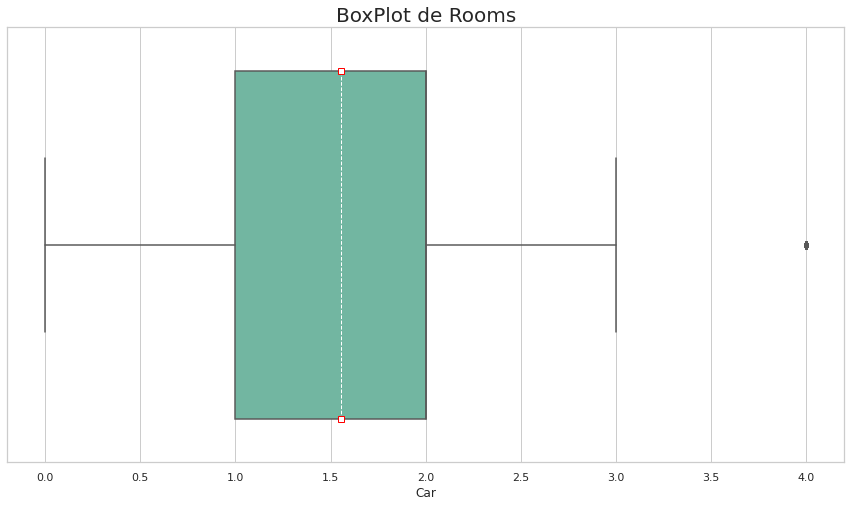

In [ ]:
sns.boxplot(
    data=melb_df_cols,
    x="Car",
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de Rooms", fontsize=20);



<html>
  <h3 align="center";>
    Columna <strong>Distance</strong>
  </h3>
</html>

Graficamos la columna `Distance`con `boxplot` y observamos los siguientes outliers

Text(0.5, 1.0, 'BoxPlot de Distance')

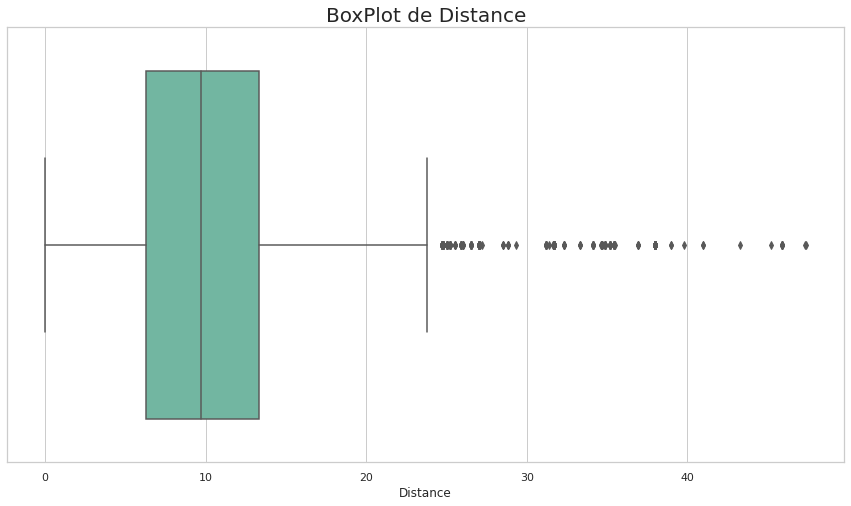

In [ ]:
sns.boxplot(data=melb_df_cols, x="Distance").set_title(
    "BoxPlot de Distance", fontsize=20
)


In [ ]:
melb_df_cols.Distance.value_counts()


11.2    504
13.9    281
9.2     237
7.8     226
5.2     209
8.8     208
13.0    199
13.8    196
2.6     186
8.0     182
10.5    175
8.4     162
11.4    162
4.6     157
5.9     148
6.4     147
7.0     137
4.5     129
3.3     128
12.1    123
7.5     123
14.7    121
7.7     113
12.4    112
9.9     112
9.7     102
5.5     101
11.8    100
3.5      98
3.8      98
6.9      95
11.7     93
14.0     89
13.5     89
6.5      86
1.6      86
8.2      83
12.6     81
6.1      80
8.5      80
12.0     80
10.4     79
12.8     79
6.3      77
17.9     77
5.3      75
10.7     75
15.5     74
3.4      73
4.2      70
9.4      69
5.6      68
6.2      67
5.1      64
7.9      64
18.0     64
13.7     64
14.5     63
16.7     62
1.8      62
13.1     61
8.7      57
2.1      55
2.5      55
6.6      55
11.0     54
14.6     54
16.1     52
8.9      51
10.8     50
14.2     49
21.5     48
17.2     48
6.7      47
10.1     46
2.4      46
4.3      44
13.3     44
13.4     43
14.3     42
7.3      42
2.3      41
13.6     40
18.4

Filtramos para que la cantidad de datos de `Distance` sea menor a 20, inclusive.

In [ ]:
melb_df_cols = melb_df_cols.loc[(melb_df_cols.Distance <= 20)]
melb_df_cols.shape


(9702, 21)

Text(0.5, 1.0, 'BoxPlot de Distance')

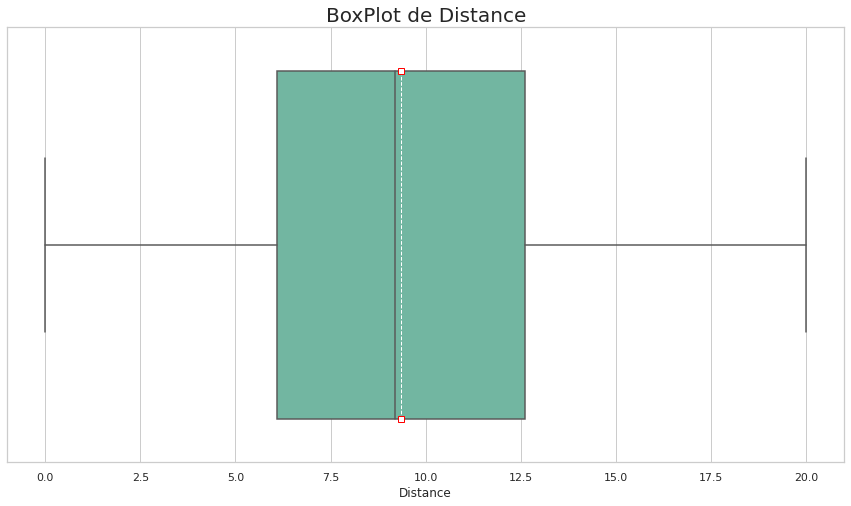

In [ ]:
sns.boxplot(
    data=melb_df_cols,
    x="Distance",
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de Distance", fontsize=20)



<html>
  <h3 align="center";>
    Columna <strong>Landsize</strong>
  </h3>
</html>

Graficamos la columna `Landsize`con `boxplot` y observamos los siguientes outliers.

Text(0.5, 1.0, 'BoxPlot de Landsize')

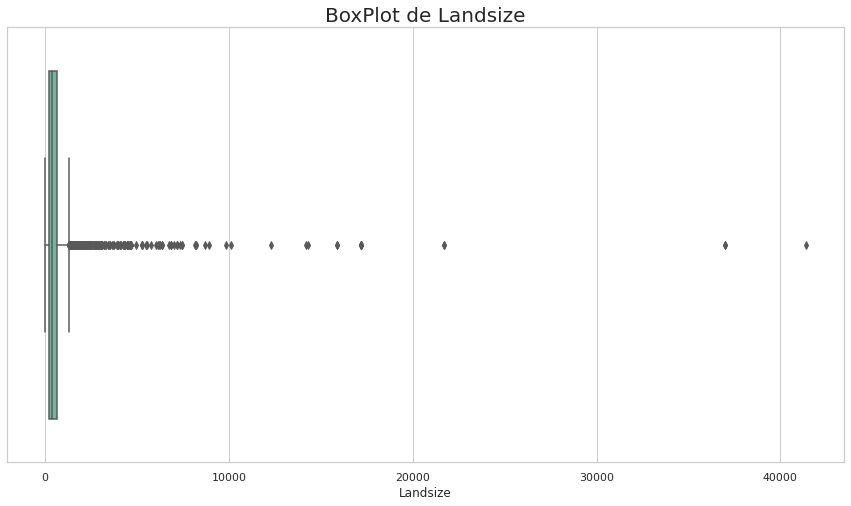

In [ ]:
sns.boxplot(data=melb_df_cols, x="Landsize").set_title(
    "BoxPlot de Landsize", fontsize=20
)


Filtramos el 5% del cuartil superior

In [ ]:
melb_df_cols09 = melb_df_cols.Landsize.quantile(0.95)
melb_df_cols = melb_df_cols.loc[melb_df_cols.Landsize <= melb_df_cols09]
print(melb_df_cols09)
print(melb_df_cols.shape)


861.9499999999989
(9216, 21)


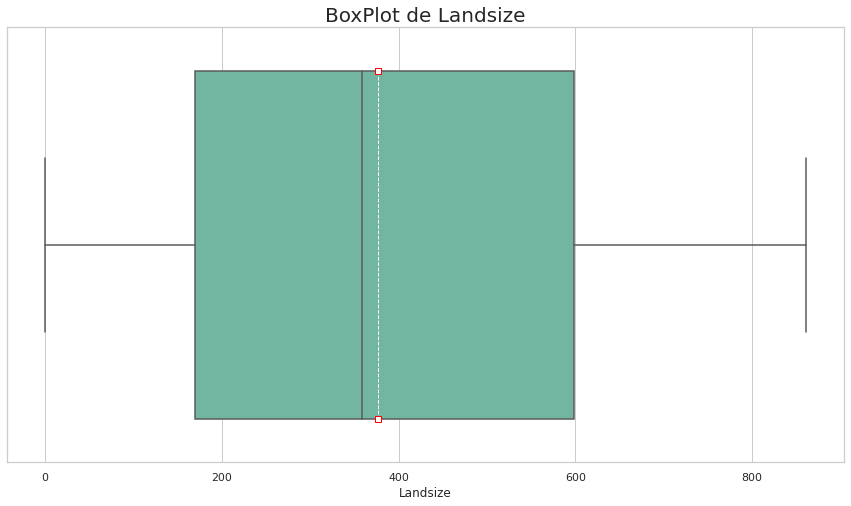

In [ ]:
sns.boxplot(
    data=melb_df_cols,
    x="Landsize",
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de Landsize", fontsize=20);



<html>
  <h3 align="center";>
    Columna <strong>Propertycount</strong>
  </h3>
</html>

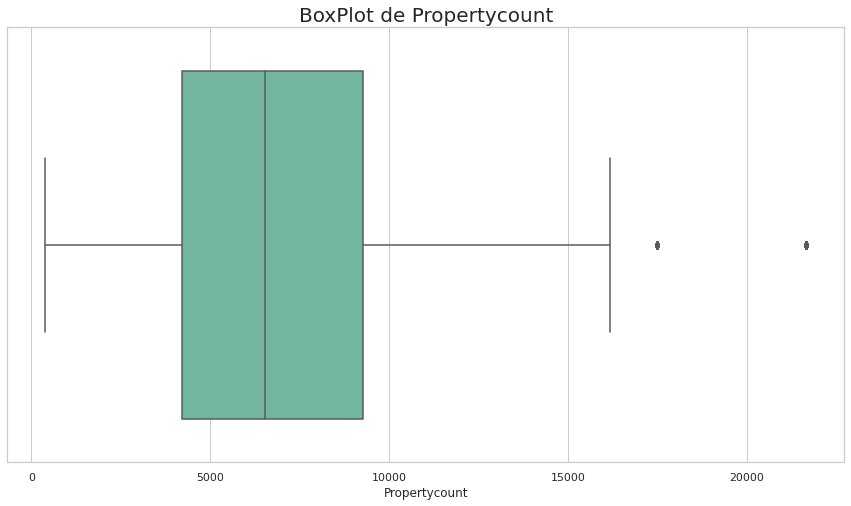

In [ ]:
sns.boxplot(data=melb_df_cols, x="Propertycount").set_title(
    "BoxPlot de Propertycount", fontsize=20
);


In [ ]:
melb_09 = melb_df_cols.Propertycount.quantile(0.95)
melb_df_cols = melb_df_cols.loc[melb_df_cols.Propertycount <= melb_09]
print(melb_09)
print(melb_df_cols.shape)


14949.0
(8881, 21)


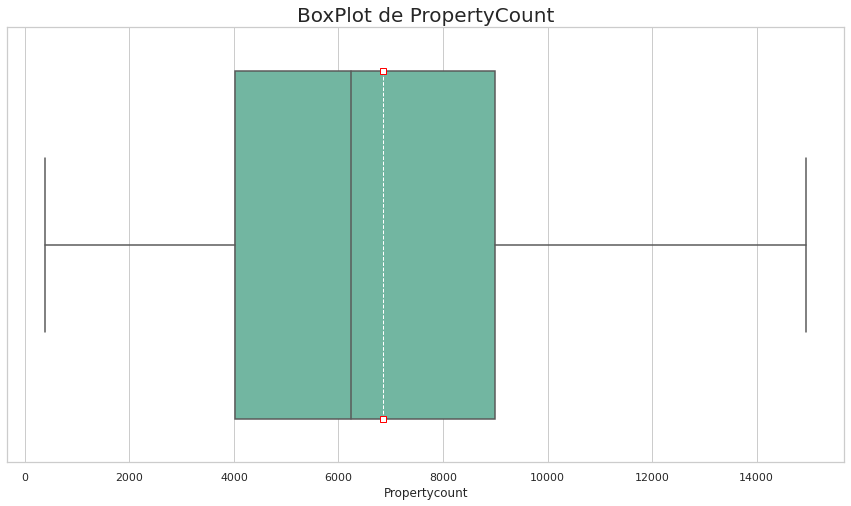

In [ ]:
sns.boxplot(
    data=melb_df_cols,
    x="Propertycount",
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de PropertyCount", fontsize=20);



<html>
  <h3 align="center";>
    Columna <strong>Regionname</strong>
  </h3>
</html>

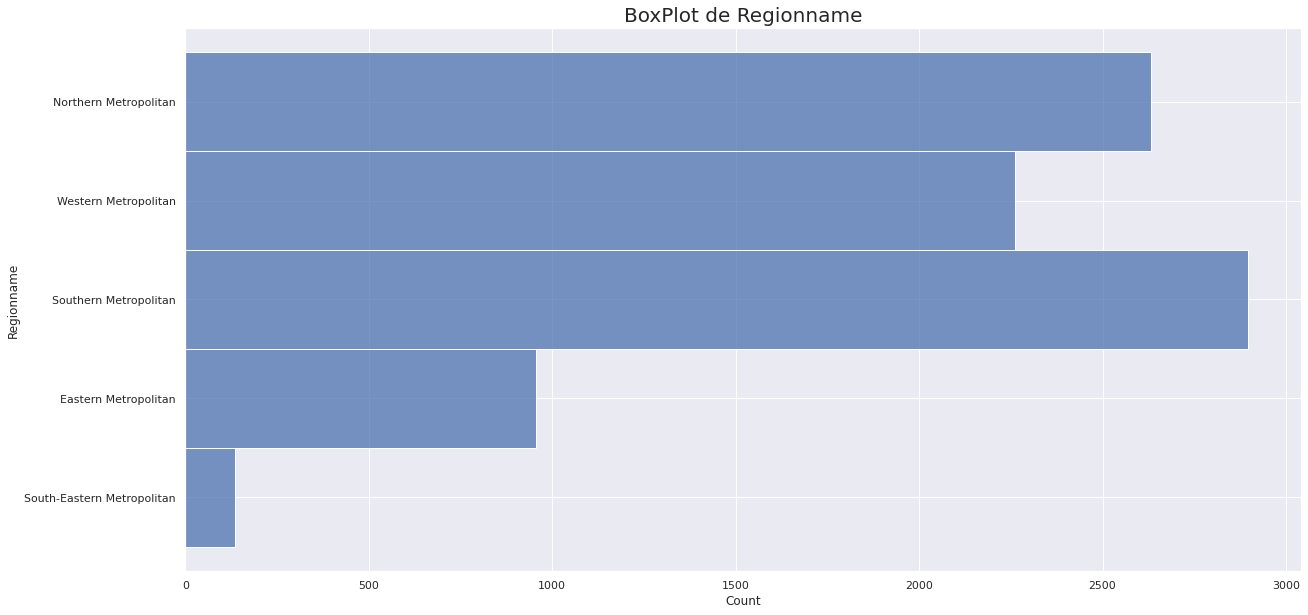

In [ ]:
sns.set(rc={"figure.figsize": (20, 10)})
sns.histplot(data=melb_df_cols, y="Regionname").set_title(
    "BoxPlot de Regionname", fontsize=20
);


<html>
  <h3 align="center";>
    Columna <strong>Type</strong>
  </h3>
</html>

Text(0.5, 1.0, 'BoxPlot de Type')

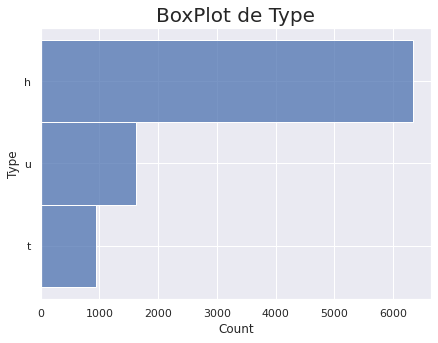

In [ ]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.histplot(data=melb_df_cols, y="Type").set_title("BoxPlot de Type", fontsize=20)


<html>
  <h3 align="center";>
    Columna <strong>Suburb</strong>
  </h3>
</html>

Graficamos la columna de los `Suburb` por su `Regionname`

In [ ]:
var_suburb= melb_df_cols.Suburb.value_counts()
list_regions = melb_df_cols.Regionname.unique().tolist()


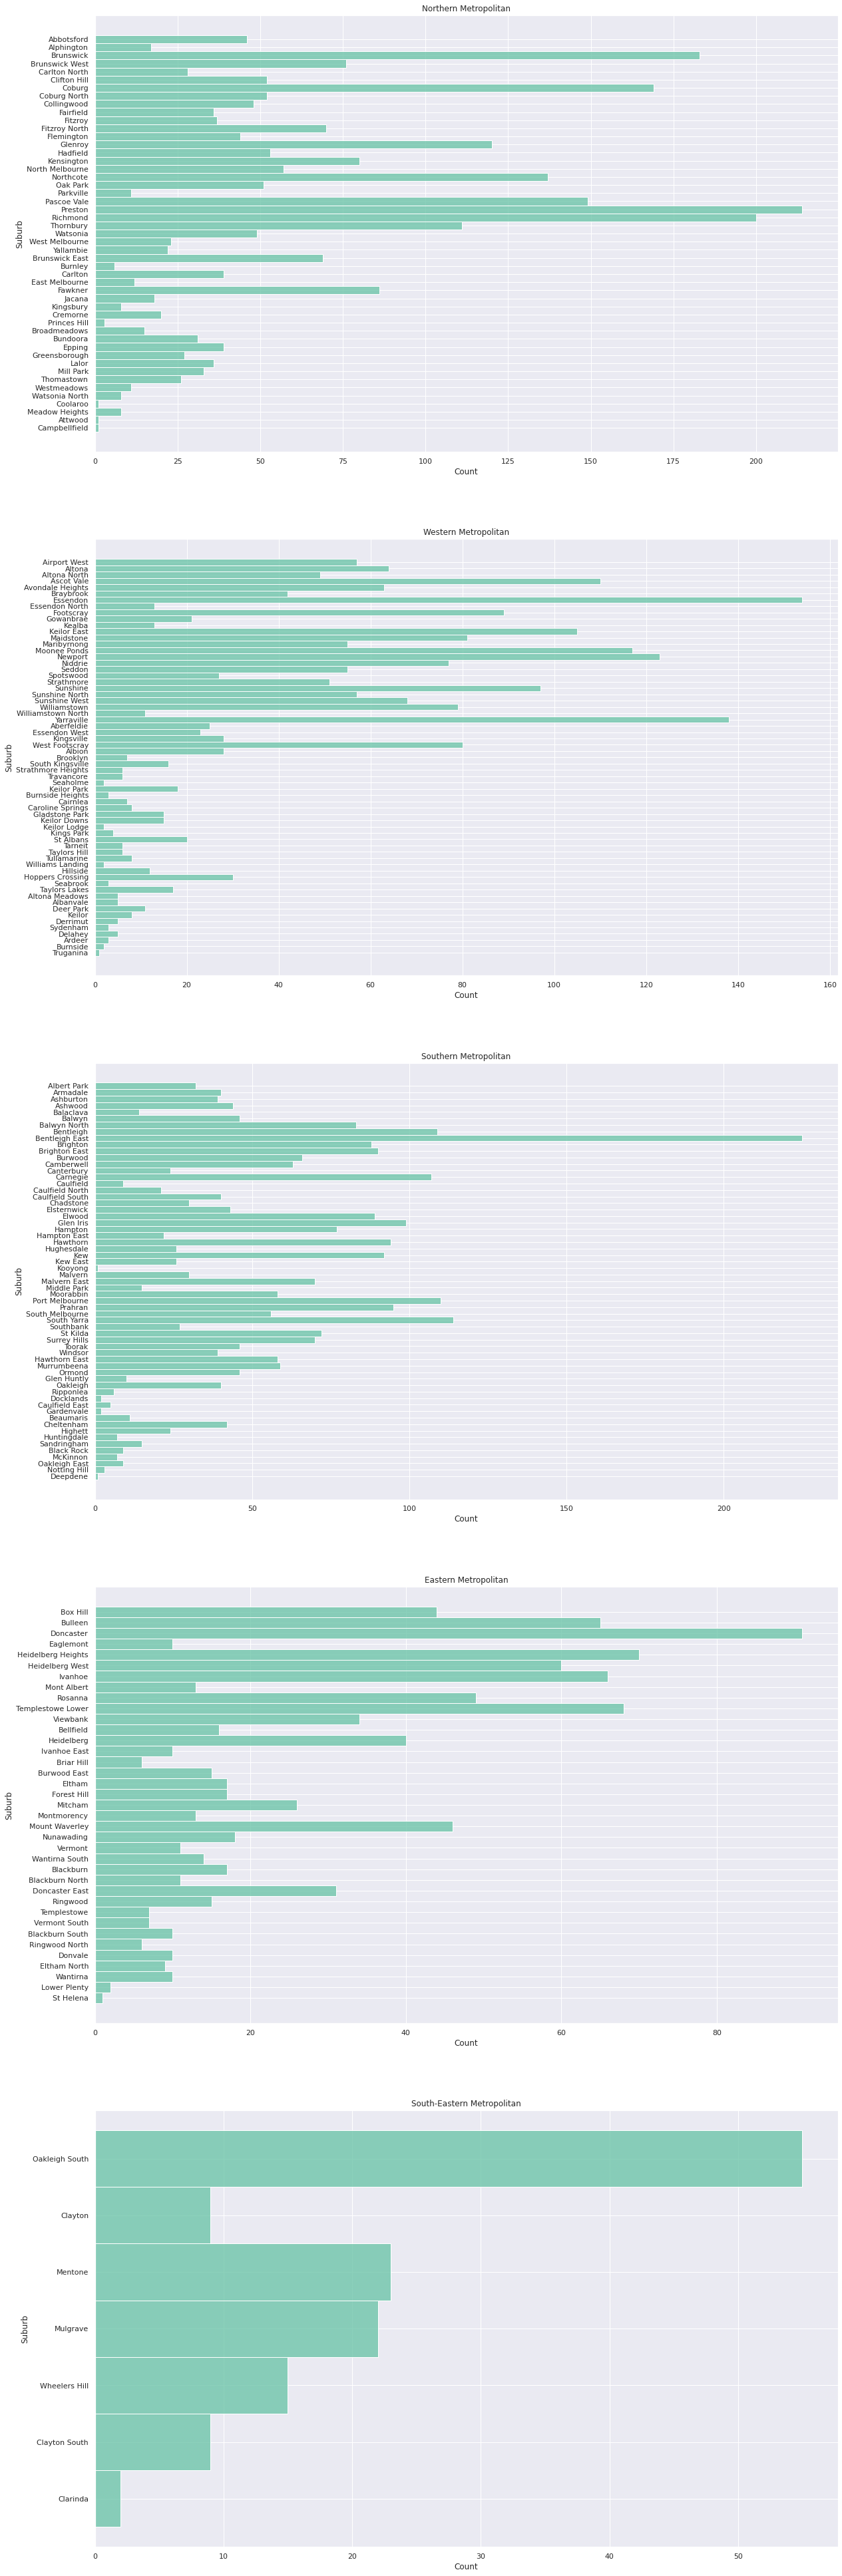

In [ ]:
def histplot_agrupado_graficos(melb_df_cols, list_regions):
    n = 0
    fig, axes = plt.subplots(nrows=len(list_regions), figsize=(20, 70))

    for i in list_regions:
        df_by_regions = melb_df_cols.loc[melb_df_cols.Regionname == i]
        sns.set_theme(style="whitegrid", palette="Set2")
        sns.histplot(y=df_by_regions["Suburb"], ax=axes[n]).set_title(i)
        n += 1

histplot_agrupado_graficos(melb_df_cols, list_regions)


Verificamos si no hay datos nullos

In [ ]:
melb_df_cols.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8881 non-null   object 
 1   Address        8881 non-null   object 
 2   Rooms          8881 non-null   int64  
 3   Type           8881 non-null   object 
 4   Price          8881 non-null   float64
 5   Method         8881 non-null   object 
 6   SellerG        8881 non-null   object 
 7   Date           8881 non-null   object 
 8   Distance       8881 non-null   float64
 9   Postcode       8881 non-null   float64
 10  Bedroom2       8881 non-null   float64
 11  Bathroom       8881 non-null   float64
 12  Car            8881 non-null   float64
 13  Landsize       8881 non-null   float64
 14  BuildingArea   4598 non-null   float64
 15  YearBuilt      5258 non-null   float64
 16  CouncilArea    8140 non-null   object 
 17  Lattitude      8881 non-null   float64
 18  Longtit

Hacemos una copia del dataframe filtrado

In [ ]:
filtered_melb_df = melb_df_cols.copy()


----
2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 



Los nombres de las columnas del dataset de **Airbnb**

In [ ]:
columns_names = airbnb_df.columns.tolist()
columns_names


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighborhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighborhood',
 'city',
 'suburb',
 'state',
 'zipcode',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30

In [ ]:
interesting_cols = [
    "description",
    "neighborhood_overview",
    "street",
    "neighborhood",
    "city",
    "suburb",
    "state",
    "zipcode",
    "price",
    "weekly_price",
    "monthly_price",
    "latitude",
    "longitude",
]

airbnb_df = pd.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv",
    usecols=interesting_cols,
)
airbnb_df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0


In [ ]:
airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22753 non-null  object 
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  price                  22895 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.3+ MB


Para poder realizar esta combinación de datos, tenemos que encontrar una columna que contenga información en común. 

Utilizaremos el `zipcode` y `Postcode`.

---
2.1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. 


Las columnas que analizaremos son las de `price`, `weekly_price` y `monthly_price`

Además, aplicaremos transformaciones como la **mediana** en cada columna.
- `price_mean`
- `price_count_mean`
- `price_mean_week`
- `price_mean_monthly`





In [ ]:
print("La cantidad de filas del dataset de Airbnb son: ",len(airbnb_df))

La cantidad de filas del dataset de Airbnb son:  22895


Antes de comenzar con la limpieza de datos, utilizamos el método `describe` para analizar si existen datos atípicos y también utilizamos el método `value_counts` que contiene recuentos de los valores únicos de esa columna.


## Columna `price`

In [ ]:
airbnb_df.price.value_counts().head()

100    1209
150     970
120     733
60      694
50      661
Name: price, dtype: int64

In [ ]:
airbnb_df.loc[:,"price"].describe().round(2)

count    22895.00
mean       148.00
std        210.88
min          0.00
25%         71.00
50%        111.00
75%        165.00
max      12624.00
Name: price, dtype: float64

## Columna `weekly_price`

In [ ]:
airbnb_df.weekly_price.value_counts().head()

700.0     74
800.0     65
1000.0    65
350.0     65
900.0     63
Name: weekly_price, dtype: int64

In [ ]:
airbnb_df.loc[:,"weekly_price"].describe().round(2)

count     2524.00
mean       906.98
std        821.22
min         91.00
25%        450.00
50%        750.00
75%       1066.00
max      11536.00
Name: weekly_price, dtype: float64

## Columna `monthly_price`

In [ ]:
airbnb_df.monthly_price.value_counts().head()

2000.0    52
3000.0    51
3500.0    45
4000.0    45
2500.0    44
Name: monthly_price, dtype: int64

In [ ]:
airbnb_df.loc[:,"monthly_price"].describe().round(2)

count     1891.00
mean      3234.35
std       2808.09
min        400.00
25%       1700.00
50%       2800.00
75%       3912.50
max      54258.00
Name: monthly_price, dtype: float64

# Limpieza de datos

Decidimos adoptar el filtro del 10% superior e inferior y eliminar los valores que corresponden a ese porcentaje en ambos extremos. 


## Columna `price`

In [ ]:
per_01_a = airbnb_df["price"].quantile(0.01)
print("Límite inferior price:", per_01_a)

per_09_a = airbnb_df["price"].quantile(0.9)
print("Límite Superior Price:", per_09_a)


Límite inferior price: 25.0
Límite Superior Price: 251.0


In [ ]:
airbnb_df_p = airbnb_df.loc[airbnb_df["price"] < per_09_a]
airbnb_df_p = airbnb_df.loc[airbnb_df["price"] > per_01_a]

print("La cantidad de Price con los cuartiles:", airbnb_df_p.shape[0])

filtered_price_airbnb_df = airbnb_df.loc[airbnb_df["price"] < per_09_a]
filtered_price_airbnb_df = filtered_price_airbnb_df.loc[
    filtered_price_airbnb_df["price"] > per_01_a
]


La cantidad de Price con los cuartiles: 22625


Text(0.5, 1.0, 'BoxPlot de Precio')

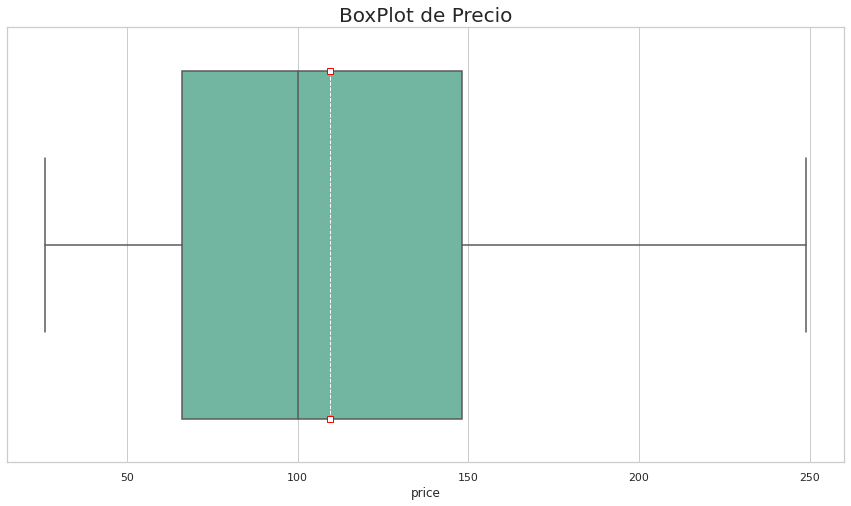

In [ ]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.boxplot(
    x=filtered_price_airbnb_df["price"],
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de Precio", fontsize=20)


In [ ]:
filtered_price_airbnb_df.loc[:,"price"].describe().round(2)

count    20020.00
mean       109.46
std         51.21
min         26.00
25%         66.00
50%        100.00
75%        148.00
max        249.00
Name: price, dtype: float64

>**Observación:**
>
>Con el filtro para tomar una muestra representativa, descartando los outliers, nos quedó una muestra de **20020** datos a comparación de **22895** datos del dataset original.

## Columna `weekly_price`

In [ ]:
per_01_a = airbnb_df["price"].quantile(0.01)
print("Límite inferior price:", per_01_a)

per_09_a = airbnb_df["price"].quantile(0.9)
print("Límite Superior Price:", per_09_a)


Límite inferior price: 25.0
Límite Superior Price: 251.0


In [ ]:
airbnb_df_p = airbnb_df.loc[airbnb_df["price"] < per_09_a]
airbnb_df_p = airbnb_df.loc[airbnb_df["price"] > per_01_a]

print("La cantidad de Price con los cuartiles:", airbnb_df_p.shape[0])

filtered_price_airbnb_df = airbnb_df.loc[airbnb_df["price"] < per_09_a]
filtered_price_airbnb_df = filtered_price_airbnb_df.loc[
    filtered_price_airbnb_df["price"] > per_01_a
]


La cantidad de Price con los cuartiles: 22625


Text(0.5, 1.0, 'BoxPlot de Precio')

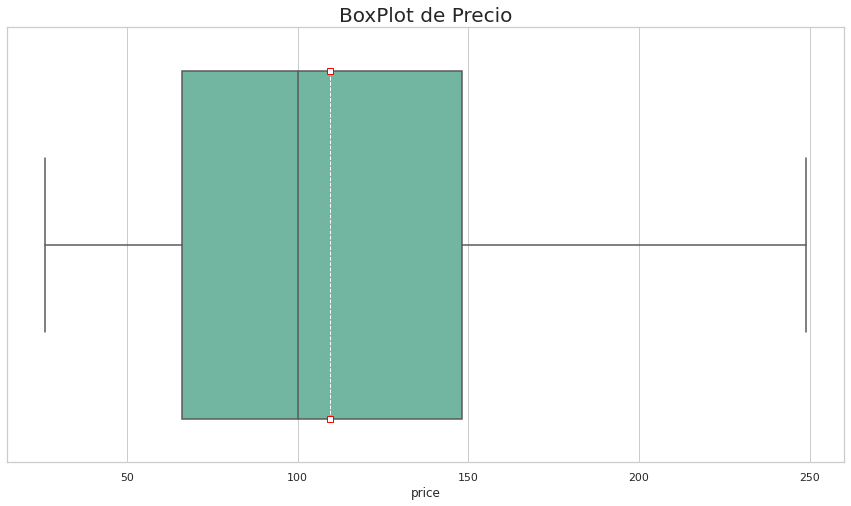

In [ ]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.boxplot(
    x=filtered_price_airbnb_df["price"],
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de Precio", fontsize=20)


In [ ]:
per_01_a_week = airbnb_df["weekly_price"].quantile(0.1)
print("Límite inferior Price:", per_01_a_week)

per_09_a_week = airbnb_df["weekly_price"].quantile(0.9)
print("Límite Superior Price:", per_09_a_week)


Límite inferior Price: 300.0
Límite Superior Price: 1600.0


In [ ]:
filtered_price_airbnb_df = airbnb_df.loc[airbnb_df["weekly_price"] < per_09_a_week]
filtered_price_airbnb_df = airbnb_df.loc[airbnb_df["weekly_price"] > per_01_a_week]

print(
    "La cantidad de weekly_price con los cuartiles:", filtered_price_airbnb_df.shape[0]
)

filtered_price_airbnb_df = airbnb_df.loc[airbnb_df["weekly_price"] < per_09_a_week]
filtered_price_airbnb_df = filtered_price_airbnb_df.loc[
    filtered_price_airbnb_df["weekly_price"] > per_01_a_week
]


La cantidad de weekly_price con los cuartiles: 2225


Text(0.5, 1.0, 'BoxPlot de Precio')

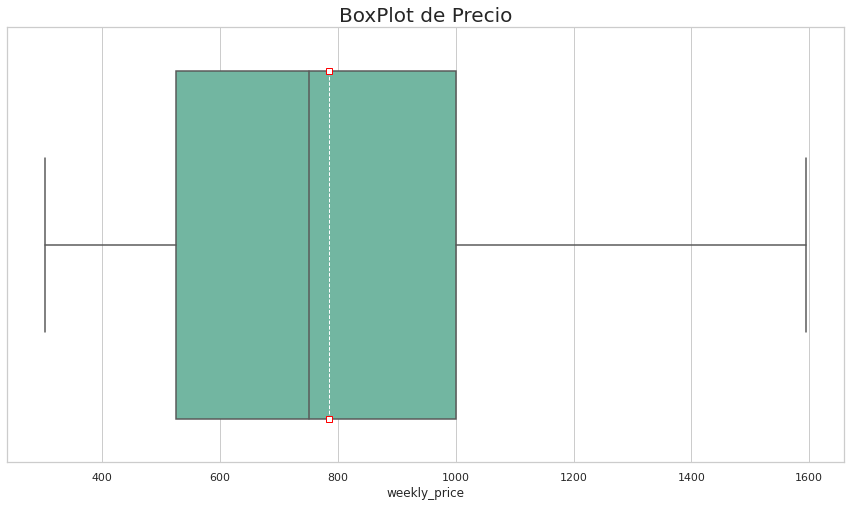

In [ ]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.boxplot(
    x=filtered_price_airbnb_df["weekly_price"],
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de Precio", fontsize=20)


In [ ]:
filtered_price_airbnb_df.loc[:, "weekly_price"].describe().round(2)


count    1970.00
mean      784.90
std       314.65
min       303.00
25%       525.00
50%       750.00
75%      1000.00
max      1595.00
Name: weekly_price, dtype: float64

>**Observación:**
>
>Con el filtro para tomar una muestra representativa, descartando los outliers, nos quedó una muestra de **1970** datos a comparación de **2524** datos del dataset original.

## Columna `monthly_week`

In [ ]:
per_01_a_month = airbnb_df["monthly_price"].quantile(0.1)
print("Límite inferior monthly_price:", per_01_a_month)

per_09_a_month = airbnb_df["monthly_price"].quantile(0.9)
print("Límite Superior monthly_price:", per_09_a_month)


Límite inferior monthly_price: 1100.0
Límite Superior monthly_price: 5572.0


In [ ]:
airbnb_df_p_month = airbnb_df.loc[airbnb_df["monthly_price"] < per_09_a_month]
airbnb_df_p_month = airbnb_df.loc[airbnb_df["monthly_price"] > per_01_a_month]

print("La cantidad de monthly_price con los cuartiles:", airbnb_df_p_month.shape[0])

filtered_price_airbnb_df = airbnb_df.loc[airbnb_df["monthly_price"] < per_09_a_month]
filtered_price_airbnb_df = filtered_price_airbnb_df.loc[
    filtered_price_airbnb_df["monthly_price"] > per_01_a_month
]


La cantidad de monthly_price con los cuartiles: 1684


Text(0.5, 1.0, 'BoxPlot de monthly_price')

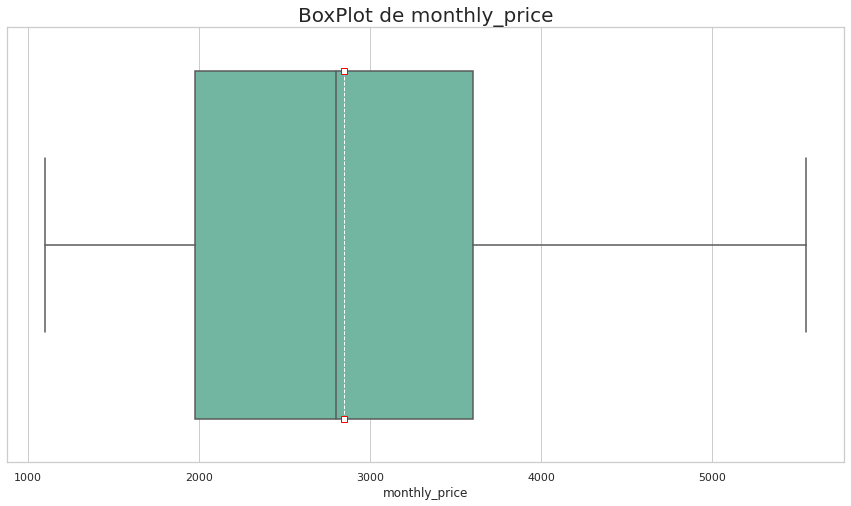

In [ ]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.boxplot(
    x=filtered_price_airbnb_df["monthly_price"],
    showmeans=True,
    meanline=True,
    meanprops={
        "marker": "s",
        "markerfacecolor": "white",
        "markeredgecolor": "red",
        "color": "white",
    },
).set_title("BoxPlot de monthly_price", fontsize=20)


In [ ]:
filtered_price_airbnb_df.loc[:, "monthly_price"].describe().round(2)


count    1492.00
mean     2848.85
std      1082.18
min      1101.00
25%      1974.00
50%      2800.00
75%      3600.25
max      5550.00
Name: monthly_price, dtype: float64

>**Observación:**
>
>Con el filtro para tomar una muestra representativa, descartando los outliers, nos quedó una muestra de **1492** datos a comparación de **1891** datos del dataset original.



## Melbourne

Antes de comenzar con la limpieza de datos, utilizamos el método `describe` para analizar si existen datos atípicos y también utilizamos el método `value_counts` que contiene recuentos de los valores únicos de esa columna.


In [ ]:
filtered_melb_df.Price.value_counts().head()


1100000.0    92
650000.0     88
1300000.0    88
800000.0     87
600000.0     85
Name: Price, dtype: int64

In [ ]:
filtered_melb_df.loc[:,'Price'].describe().round(2)


count       8881.00
mean      993064.34
std       345125.16
min       480500.00
25%       708000.00
50%       920000.00
75%      1250000.00
max      1848000.00
Name: Price, dtype: float64

>**Observación:**
>
>Con todos los filtros realizado en el punto 1 nos quedó una muestra de **8881** datos a comparación de **13580** datos del dataset original.

----

2.2. Utilizar la variable zipcode para unir los conjuntos de datos. 
  
Sólo incluir los **zipcodes** que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

In [ ]:
filtered_price_airbnb_df["zipcode"] = pd.to_numeric(
    filtered_price_airbnb_df.zipcode, errors="coerce"
)


In [ ]:
filtered_price_airbnb_df.zipcode.value_counts().tail()


3145.0    1
3088.0    1
3027.0    1
3770.0    1
3105.0    1
Name: zipcode, dtype: int64

In [ ]:
filtered_melb_df.Postcode.value_counts().tail()


3022.0    3
3027.0    2
3008.0    2
3093.0    2
3061.0    1
Name: Postcode, dtype: int64

<html>
  <h3 align="center";>
    Valores en común
  </h3>
</html>

Antes de unir los conjuntos de datos, tenemos que asegurarnos de que tengamos suficientes registros en común como para agregar información relevantes.

In [ ]:
intersection = np.intersect1d(
    filtered_price_airbnb_df.zipcode.values,
    filtered_melb_df.Postcode.values,
    assume_unique=False,
)
print("ZipCode unicos de Airbnb:", len(filtered_price_airbnb_df.zipcode.unique()))
print("ZipCode unicos de Melbourne:", len(filtered_melb_df.Postcode.unique()))
print("ZipCode en común:", len(intersection))


ZipCode unicos de Airbnb: 153
ZipCode unicos de Melbourne: 131
ZipCode en común: 101


In [ ]:
print(
    "Promedio del dataset de Melbourne correspondiente con el ZipCode del dataset de Airbnb:",
    round(
        filtered_melb_df.Postcode.isin(intersection).sum() / len(filtered_melb_df), 2
    ),
)
print(
    "Promedio del dataset de Melbourne con correspondiete con el ZipCode de Melbourne:",
    round(
        filtered_price_airbnb_df.zipcode.isin(intersection).sum()
        / len(filtered_price_airbnb_df),
        2,
    ),
)


Promedio del dataset de Melbourne correspondiente con el ZipCode del dataset de Airbnb: 0.86
Promedio del dataset de Melbourne con correspondiete con el ZipCode de Melbourne: 0.77


<html>
  <h3 align="center";>
    Operación merge
  </h3>
</html>

Es hora de combinar ambos conjuntos de datos. Una opción frecuentemente tentadora es aplicar la operación merge sin analizar demasiado la situación. Sin embargo, ¡esta operación puede ocasionar una **explosión exponencial** de nuestro conjunto de datos!


Recordemos que nuestro objetivo es agregar información sobre el valor del vecindario de la propiedad. 

**¿Qué información del conjunto de airbnb nos sirve para representar esto?**

* Promedio de `price` por zipcode
* Promedio de `weekly_price` por zipcode
* Promedio de `monthly_price` por zipcode


In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

Agrupar y agregar utilizando más de un tipo de operación es un poco más complicado. Pandas nos provee de muchas formas de escribir la misma operación. Ninguna de ellas es muy intuitiva, y usualmente requiere renombrar las columnas para darles nombres más significativos.

In [ ]:
filtered_price_airbnb_df[relevant_cols + ["zipcode"]].groupby(
    "zipcode"
).mean().reset_index()[:5]


,zipcode,price,weekly_price,monthly_price
0,3000.0,139.426316,919.415730,3375.942105
1,3002.0,137.277778,1059.230769,3406.388889
2,3003.0,132.500000,743.857143,2629.500000
3,3004.0,182.304348,1017.409091,3469.913043
4,3006.0,167.038961,995.297297,3464.246753


Creamos la columna media de `price`, `weekly_price` y `monthly_price` con relación a `zipcode`

In [ ]:
relevant_cols = ["price", "weekly_price", "monthly_price", "zipcode"]

airbnb_price_by_zipcode = (
    filtered_price_airbnb_df[relevant_cols]
    .groupby("zipcode")
    .agg({"price": ["count", "mean"], "weekly_price": "mean", "monthly_price": "mean"})
    .reset_index()
)

airbnb_price_by_zipcode.columns = [
    " ".join(col).strip() for col in airbnb_price_by_zipcode.columns.values
]

airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={
        "price count": "airbnb_record_count",
        "price mean": "airbnb_price_mean",
        "weekly_price mean": "airbnb_weekly_price_mean",
        "monthly_price mean": "airbnb_monthly_price_mean",
    }
)

airbnb_price_by_zipcode = airbnb_price_by_zipcode.round()


In [ ]:
airbnb_price_by_zipcode['airbnb_record_count'].describe()

count    152.000000
mean       9.776316
std       21.855091
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      190.000000
Name: airbnb_record_count, dtype: float64

Observamos con el método `describe` que la mayor cantidad de `zipcode` es **107**. 

Por lo tanto, optamos por filtrar hasta **8** como mayor cantidad de `zipcode` que nos parece más relevante. 

In [ ]:
airbnb_price_by_zipcode = airbnb_price_by_zipcode[
    airbnb_price_by_zipcode["airbnb_record_count"] < 8
]


In [ ]:
airbnb_price_by_zipcode.head()


,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
7,3012.0,4,98.0,700.0,2670.0
9,3015.0,3,73.0,546.0,2002.0
10,3016.0,4,107.0,612.0,2120.0
11,3018.0,1,84.0,525.0,2100.0
12,3021.0,1,71.0,350.0,1300.0


 Combinación de ambos datasets `Melbourne` y `Airbnb`, mediante las columnas `zipcode` y `Postcode`

In [ ]:
merged_sales_df = filtered_melb_df.merge(
    airbnb_price_by_zipcode, how="left", left_on="Postcode", right_on="zipcode"
).round()
merged_sales_df


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.0,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.0,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.0,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.0,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.0,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.0,3049.0,3.0,2.0,2.0,256.0,NaN,NaN,NaN,-38.0,145.0,Northern Metropolitan,2474.0,NaN,NaN,NaN,NaN,NaN
8877,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,17.0,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-38.0,145.0,South-Eastern Metropolitan,7392.0,NaN,NaN,NaN,NaN,NaN
8878,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,7.0,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-38.0,145.0,Western Metropolitan,6380.0,3016.0,4.0,107.0,612.0,2120.0
8879,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,7.0,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-38.0,145.0,Western Metropolitan,6380.0,3016.0,4.0,107.0,612.0,2120.0


In [ ]:
merged_sales_df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
count,8881.000000,8.881000e+03,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,4598.000000,5258.000000,8881.0,8881.0,8881.000000,4688.000000,4688.000000,4688.000000,4635.00000,4688.000000
mean,2.860038,9.930643e+05,9.308073,3091.923094,2.838757,1.447697,1.526179,372.168224,135.713789,1962.881514,-38.0,145.0,6843.920054,3089.037969,3.204352,106.889292,619.48069,2284.356015
std,0.714318,3.451252e+05,4.200776,59.775696,0.720915,0.574217,0.843641,245.673932,122.256659,38.183316,0.0,0.0,3581.938114,56.795463,1.797293,41.709669,198.33224,711.466906
min,1.000000,4.805000e+05,1.000000,3002.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.0,145.0,389.000000,3012.000000,1.000000,46.000000,300.00000,1150.000000
25%,2.000000,7.080000e+05,6.000000,3041.000000,2.000000,1.000000,1.000000,168.000000,97.000000,1940.000000,-38.0,145.0,4019.000000,3041.000000,1.000000,78.000000,498.00000,1801.000000
50%,3.000000,9.200000e+05,9.000000,3076.000000,3.000000,1.000000,2.000000,349.000000,122.000000,1966.000000,-38.0,145.0,6244.000000,3081.000000,3.000000,96.000000,600.00000,2111.000000
75%,3.000000,1.250000e+06,13.000000,3145.000000,3.000000,2.000000,2.000000,595.000000,157.000000,1998.000000,-38.0,145.0,8989.000000,3131.000000,4.000000,124.000000,700.00000,2702.000000
max,4.000000,1.848000e+06,20.000000,3207.000000,5.000000,3.000000,4.000000,861.000000,6791.000000,2018.000000,-38.0,145.0,14949.000000,3204.000000,7.000000,219.000000,1300.00000,4250.000000


----

2.3 Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.

- Usando la columna `Date`

Primero, hacemos una copia del dataset filtrado de **Melbourne**

In [ ]:
df_copy_ = filtered_melb_df.copy()


In [ ]:
df_copy_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8881 non-null   object 
 1   Address        8881 non-null   object 
 2   Rooms          8881 non-null   int64  
 3   Type           8881 non-null   object 
 4   Price          8881 non-null   float64
 5   Method         8881 non-null   object 
 6   SellerG        8881 non-null   object 
 7   Date           8881 non-null   object 
 8   Distance       8881 non-null   float64
 9   Postcode       8881 non-null   float64
 10  Bedroom2       8881 non-null   float64
 11  Bathroom       8881 non-null   float64
 12  Car            8881 non-null   float64
 13  Landsize       8881 non-null   float64
 14  BuildingArea   4598 non-null   float64
 15  YearBuilt      5258 non-null   float64
 16  CouncilArea    8140 non-null   object 
 17  Lattitude      8881 non-null   float64
 18  Longtit

Convertimos el tipo de dato de `Date` a `datetime64`

In [ ]:
df_copy_["Date"] = df_copy_["Date"].apply(
    lambda x: pd.to_datetime(x, errors="coerce", utc=True)
)


In [ ]:
df_copy_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Suburb         8881 non-null   object             
 1   Address        8881 non-null   object             
 2   Rooms          8881 non-null   int64              
 3   Type           8881 non-null   object             
 4   Price          8881 non-null   float64            
 5   Method         8881 non-null   object             
 6   SellerG        8881 non-null   object             
 7   Date           8881 non-null   datetime64[ns, UTC]
 8   Distance       8881 non-null   float64            
 9   Postcode       8881 non-null   float64            
 10  Bedroom2       8881 non-null   float64            
 11  Bathroom       8881 non-null   float64            
 12  Car            8881 non-null   float64            
 13  Landsize       8881 non-null   float64         

In [ ]:
df_copy_.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12 00:00:00+00:00,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02 00:00:00+00:00,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03 00:00:00+00:00,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03 00:00:00+00:00,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06 00:00:00+00:00,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df_copy_ = df_copy_.sort_values(by="Date")


Dividimos por el trimestre de la fecha en los datos basados ​​en fecha y hora.

In [ ]:
df_copy_.Date.dt.quarter
df_date = df_copy_.groupby(df_copy_["Date"].dt.quarter).mean().round()


In [ ]:
df_date.head()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
1,3.0,1009890.0,9.0,3094.0,3.0,1.0,1.0,369.0,132.0,1965.0,-38.0,145.0,6935.0
2,3.0,983695.0,9.0,3092.0,3.0,1.0,1.0,356.0,133.0,1962.0,-38.0,145.0,6881.0
3,3.0,981323.0,10.0,3090.0,3.0,1.0,2.0,393.0,136.0,1964.0,-38.0,145.0,6837.0
4,3.0,1019975.0,9.0,3094.0,3.0,1.0,2.0,364.0,141.0,1961.0,-38.0,145.0,6715.0


In [ ]:
df_date = df_date.reset_index()


In [ ]:
df_date["Price"].describe()


count    4.000000e+00
mean     9.987208e+05
std      1.919158e+04
min      9.813230e+05
25%      9.831020e+05
50%      9.967925e+05
75%      1.012411e+06
max      1.019975e+06
Name: Price, dtype: float64

Realizamos un **Histograma** con los trimestres de la columna `Date` con la relación del `Price`

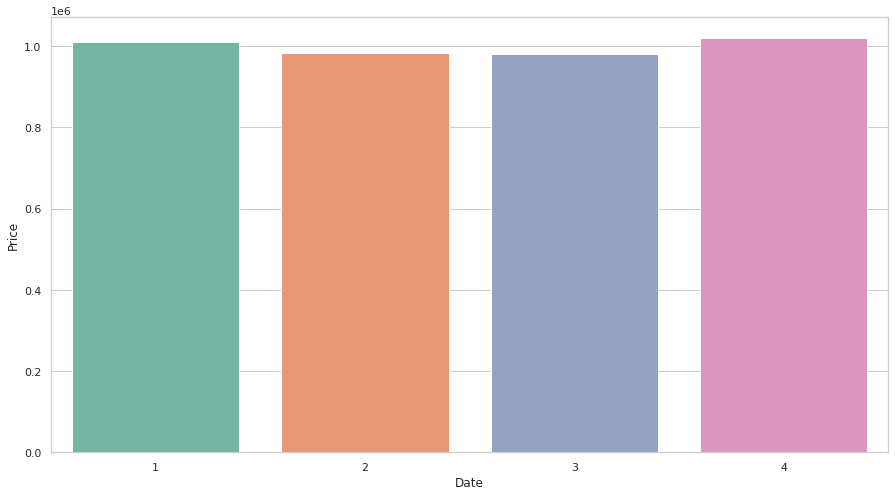

In [ ]:
ax = sns.barplot(x="Date", y="Price", data=df_date)


>**Observación:**
>
>Observamos que no hay variación de Precio con respecto a la columa `Date`

- Comparación con la columna `Price` con las columnas `Suburb` y `RegionName`

In [ ]:
df_suburb_region_per_price = df_copy_.pivot_table(
    index="Suburb",
    columns="Regionname",
    values="Price",
    aggfunc="count",
    margins=True,
    margins_name="Total",
)
df_suburb_region_per_price


Regionname,Eastern Metropolitan,Northern Metropolitan,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Total
Suburb,,,,,,
Abbotsford,NaN,46.0,NaN,NaN,NaN,46
Aberfeldie,NaN,NaN,NaN,NaN,25.0,25
Airport West,NaN,NaN,NaN,NaN,57.0,57
Albanvale,NaN,NaN,NaN,NaN,5.0,5
Albert Park,NaN,NaN,NaN,32.0,NaN,32
Albion,NaN,NaN,NaN,NaN,28.0,28
Alphington,NaN,17.0,NaN,NaN,NaN,17
Altona,NaN,NaN,NaN,NaN,64.0,64
Altona Meadows,NaN,NaN,NaN,NaN,5.0,5


>**Observación:**
>
>Observamos que este dato no nos parece relevante para incorporarlo al Dataframe

---
## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

- Columnas del extendido

In [ ]:
merged_sales_df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'zipcode',
       'airbnb_record_count', 'airbnb_price_mean', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')

- Convertimos a `csv` al DataFrame extendido

In [ ]:
merged_sales_df.to_csv("melb_data_extended.csv", index=None)


In [ ]:
from google.colab import files  # Download
files.download("melb_data_extended.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merge_melb = pd.read_csv(
    "/content/melb_data_extended.csv",
)
merge_melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.0,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.0,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.0,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.0,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.0,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.0,3049.0,3.0,2.0,2.0,256.0,NaN,NaN,NaN,-38.0,145.0,Northern Metropolitan,2474.0,NaN,NaN,NaN,NaN,NaN
8877,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,17.0,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-38.0,145.0,South-Eastern Metropolitan,7392.0,NaN,NaN,NaN,NaN,NaN
8878,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,7.0,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-38.0,145.0,Western Metropolitan,6380.0,3016.0,4.0,107.0,612.0,2120.0
8879,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,7.0,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-38.0,145.0,Western Metropolitan,6380.0,3016.0,4.0,107.0,612.0,2120.0


<html>
<hr>
  <h3 align="center";>
    Conclusión 
  </h3>
</html>

El análisis y la curación consistió en la selección del subconjunto de columnas del dataframe de Melbourne que se consideraron de interés para la predicción de precios de las propiedades, y su intersección con el dataset de Airbnb 
mediante la variable común zipcode (código postal).

El trabajo práctico, como primer abordaje al Análisis y Curación en la Ciencia de Datos, nos muestra que se trata de una tarea ardua, que da origen a múltiples decisiones y que además revela patrones en las muestras obtenidas y también da lugar a la detección de falsas intuiciones dadas por el sesgo cognitivo de quienes manipulan el dataset.  

Este procedimiento dio origen a múltiples decisiones para lograr la curación, a saber:
- **Selección de columnas relevantes y eliminación de valores extremos:**

 Se generó una visualización general de los datos faltantes y existentes del Dataset con la herramienta `missingno`; luego se realizó una visualización de las distribuciones y relaciones de las columnas elegidas como relevantes a la cotización de las propiedades, y fue de utilidad _histplot_ y _lineplot_. También se calculó la cantidad de datos nulos por cada columna cosiderada relevante y se detectó la repetición de datos informados por columnas  similares, por lo cual se decició ignorar aquella que tiene más cantidad de datos nulos. 
 
 El siguiente procedimiento consistió en tomar las columnas relevantes: a las variables numéricas se las visualizaó con _boxplot_ y se obtuvo los principales valores de la estadística descriptiva y con ello se computó la eliminación de outliers: recortando el 10% y el 90%. De esta manera se obtuvo datos representativos de las mismas. Las variables categóricas fue conveniente utilizar _histplot_
 
 
- **Extensión del dataset con los datos provistos por Airbnb:**

  Mediante la extensión y combinación de los datos provistos por el dataset de Airbnb, se consideraró útil el *análisis de price, weekly_price y monthly_price*. Para ello, también se efectuó la eliminación de valores extremos en el dataset de Airbnb. La combinación de ambos dataframes, y la transformación elegida -al agrupar por zipcodes- fue la media, se tuvo en cuenta evitar el desbalance debido al peso de las medias de aquellos zipcodes que tienen múltiples registros, ésta llevó a limitar un máximo de 7 filas por zipcode. 

- **Variables adicionales:**

  El práctico indicaba realizar una elección de variables adicionales que se consideraron en un prinicipio adecuadas para la predicción de precios de las propiedades, y justificar si son adeacuadas o no:

  - **Date:** manifiesta el registro de la fecha donde se imputó los datos y el precio de la propiedad. En un principio, se intuyó que existe una variación de la cotización según la fecha, para comprobar esta hipótesis, se procedió a:

    - homogeneizar el tipo de la fecha y agrupar en periodos trimestrales para comprobar si existe una variación de la cotización. Sin embargo, el análisis de su visualización no mostró evidencias a favor de la hipótesis inicial. Por lo tanto, se decidió que no será de importancia para el análisis.

  - **Suburb y RegionName:** mediante una tabla dinámica _pivot table_, se determinó que no se visualiza ni patrones ni tendencias respecto al precio, entonces se decidió no tenerla en cuenta.

 

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)